In [180]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [181]:
# Read the sales data

df_product = pd.read_csv("./Resources/PROD_final.csv")
df_sales = pd.read_csv("./Resources/SALES_final2.csv")

# Display sample data
df_product.head()

,Part_No,Description,Category,Vendor No,Available,On Hand,Current Cost,Volume (inch^3),Length (UDF),Width (UDF),Height (UDF),Weight (UDF),Product Code,Pallet Quantity (Incoming Max) (UDF),Pallet Length (inches) (UDF),Pallet Width (inches) (UDF)
0,111MedPol009R,Med. Pile Polycarbonate 9Mat 40x40,Polycarbonate Chair Mat,MANU123,0,0,39.59700,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
1,111MedPol9RBL,Med.Pile Poly 9Mat 40x40 Blue,Polycarbonate Chair Mat,MANU123,13,13,36.68120,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
2,111MedPol09RC,Med.Pile Poly 9Mat 40x40 Cerise,Polycarbonate Chair Mat,MANU123,0,0,38.62101,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
3,111MedPol23LR,Med. Pile Polycarbonate 48x53 w/lip,Polycarbonate Chair Mat,MANU123,3,3,51.41580,1347.5,47.0,12.0,12.0,11.0,MATS,100,62,48
4,111AllPol23ER,All Carpet Polycarbonate 60'x60',Polycarbonate Chair Mat,MANU123,2,2,88.64100,14400.0,60.0,14.0,14.0,17.0,MATS,15,62,50


In [182]:
df_sales = df_sales[df_sales['Invoice Date'].notna()]

In [183]:

df_sales.head()

,Unit Price,Invoice Date,Order Qty,Ship Qty,B/O,Extended price,U/M,Margin % (Current),Currency,Product Code,Part_No,PO No,Customer No,Invoice No
0,33.95,43102.0,1,1,0,33.95,EA,38,NaN,MATS,123HarPVC20LV,CA100436839,WAYFAR,301833
1,101.90,43104.0,1,1,0,101.90,EA,58,NaN,MATS,FPRPreEnt72CH,64242622,STAPLESDS,302672
2,50.20,43109.0,2,2,0,100.40,EA,58,NaN,MATS,FCOCoAnt36BK,64286923,STAPLESDS,302946
3,130.00,43111.0,2,2,0,260.00,EA,45,NaN,MATS,111AllPol23ER,177671,G&THOO,302517
4,84.70,43111.0,4,4,0,338.80,EA,41,NaN,MATS,111MedPol23ER,64322719,STAPLES,302514


In [184]:
df_sales.shape

(67288, 14)

In [185]:
df_sales['Invoice Date']=df_sales['Invoice Date'].astype(int)
df_sales['Invoice Date'].dtype

dtype('int32')

In [186]:
df_sales['Invoice Date']=df_sales['Invoice Date'].astype(int)

for i in range(0, len(df_sales['Invoice Date'])):
   df_sales['Invoice Date'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + df_sales['Invoice Date'][i] - 2)

In [187]:
df_sales.head()

,Unit Price,Invoice Date,Order Qty,Ship Qty,B/O,Extended price,U/M,Margin % (Current),Currency,Product Code,Part_No,PO No,Customer No,Invoice No
0,33.95,2018-01-02 00:00:00,1,1,0,33.95,EA,38,NaN,MATS,123HarPVC20LV,CA100436839,WAYFAR,301833
1,101.90,2018-01-04 00:00:00,1,1,0,101.90,EA,58,NaN,MATS,FPRPreEnt72CH,64242622,STAPLESDS,302672
2,50.20,2018-01-09 00:00:00,2,2,0,100.40,EA,58,NaN,MATS,FCOCoAnt36BK,64286923,STAPLESDS,302946
3,130.00,2018-01-11 00:00:00,2,2,0,260.00,EA,45,NaN,MATS,111AllPol23ER,177671,G&THOO,302517
4,84.70,2018-01-11 00:00:00,4,4,0,338.80,EA,41,NaN,MATS,111MedPol23ER,64322719,STAPLES,302514


In [188]:
df_sales['Part_No'].value_counts()

121HarPVC20EV     8457
129HarPVC20LV     6949
119LowPVC25LV     4994
123HarPVC20LV     3176
FCVLaSte836A      2190
                  ... 
129HarPol19SR        2
1218HarPol19ER       1
FBDDesDes36RA        1
FPDAnDes84RA         1
FPDAnDes924V         1
Name: Part_No, Length: 157, dtype: int64

In [189]:
sales=df_sales[['Invoice Date', 'Ship Qty', 'Part_No']]
sales.head()

,Invoice Date,Ship Qty,Part_No
0,2018-01-02 00:00:00,1,123HarPVC20LV
1,2018-01-04 00:00:00,1,FPRPreEnt72CH
2,2018-01-09 00:00:00,2,FCOCoAnt36BK
3,2018-01-11 00:00:00,2,111AllPol23ER
4,2018-01-11 00:00:00,4,111MedPol23ER


In [190]:
sales.dtypes

Invoice Date    object
Ship Qty         int64
Part_No         object
dtype: object

In [191]:
products=df_product[['Category', 'Part_No']]
products.head()

,Category,Part_No
0,Polycarbonate Chair Mat,111MedPol009R
1,Polycarbonate Chair Mat,111MedPol9RBL
2,Polycarbonate Chair Mat,111MedPol09RC
3,Polycarbonate Chair Mat,111MedPol23LR
4,Polycarbonate Chair Mat,111AllPol23ER


In [192]:
sales=pd.merge(sales, products)
sales.head()

,Invoice Date,Ship Qty,Part_No,Category
0,2018-01-02 00:00:00,1,123HarPVC20LV,PVC Chair Mat
1,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat
2,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat
3,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat
4,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat


In [193]:
sales['Date']=pd.to_datetime(sales['Invoice Date'])
sales.dtypes

Invoice Date            object
Ship Qty                 int64
Part_No                 object
Category                object
Date            datetime64[ns]
dtype: object

In [194]:
#import datetime as dt
sales['year'] = sales['Date'].dt.year
sales['month'] = sales['Date'].dt.month
sales['day'] = sales['Date'].dt.day
sales.head()

,Invoice Date,Ship Qty,Part_No,Category,Date,year,month,day
0,2018-01-02 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-02,2018,1,2
1,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-19,2018,1,19
2,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-19,2018,1,19
3,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-22,2018,1,22
4,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat,2018-01-22,2018,1,22


In [195]:
sales.dtypes

Invoice Date            object
Ship Qty                 int64
Part_No                 object
Category                object
Date            datetime64[ns]
year                     int64
month                    int64
day                      int64
dtype: object

In [196]:
sales.shape

(64218, 8)

In [197]:
sales.rename(columns = {'Ship Qty':'Ship Quantity'}, inplace = True)
sales['Category'].value_counts()

PVC Chair Mat                31150
Polycarbonate Chair Mat       8987
Recycled Chair Mat            5544
Anti-Fatigue Mat              5228
Desk Pad                      4267
Steel Whiteboard              4178
Porcelain Whiteboard          2248
Entrance Mat                  1412
Tempered Glass Chair Mat       678
Tempered Glass Whiteboard      526
Name: Category, dtype: int64

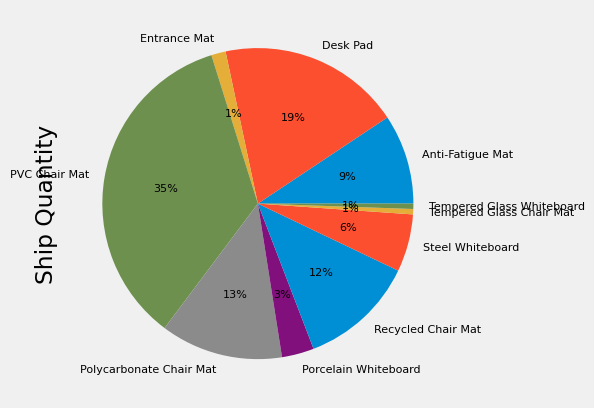

In [198]:
sales.groupby(['Category']).sum().plot(kind='pie', y='Ship Quantity', autopct='%1.0f%%', legend=False, fontsize=8)
plt.show()

In [199]:
product_1=sales.loc[(sales['Category']=='Anti-Fatigue Mat')]

product_1.head()


,Invoice Date,Ship Quantity,Part_No,Category,Date,year,month,day
3263,2018-01-09 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-09,2018,1,9
3264,2018-01-12 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-12,2018,1,12
3265,2018-01-17 00:00:00,1,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-17,2018,1,17
3266,2018-01-17 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-17,2018,1,17
3267,2018-01-17 00:00:00,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018-01-17,2018,1,17


0. PREPARING THE DATA FOR THE SARIMA MODEL

In [200]:
#SELECTING THE CATEGORY:
"""PVC Chair Mat                31150
Polycarbonate Chair Mat       8987
Recycled Chair Mat            5544
Anti-Fatigue Mat              5228
Desk Pad                      4267
Steel Whiteboard              4178
Porcelain Whiteboard          2248
Entrance Mat                  1412
Tempered Glass Chair Mat       678
Tempered Glass Whiteboard      526
Sales
"""
category='Sales'

def dataframe(category):
    prod=sales.loc[(sales['Category']==category)]
    pro=prod.groupby(pd.to_datetime(prod['Date']).dt.strftime('%y-%m'))['Ship Quantity'].sum()
    pro=pd.DataFrame(pro)
    return pro 

if (category != 'Sales'):
    pro=dataframe(category)
else:
    pro=sales.groupby(pd.to_datetime(sales['Date']).dt.strftime('%y-%m'))['Ship Quantity'].sum()
    pro=pd.DataFrame(pro)
pro.head()

,Ship Quantity
Date,
18-01,759
18-02,1533
18-03,1406
18-04,1212
18-05,1226


1. IMPORTING ALL LIBRARIES

In [201]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


2. ANALYZING THE DATA AND SUGGESTING THE PARAMETERS FOR THE SARIMA MODEL

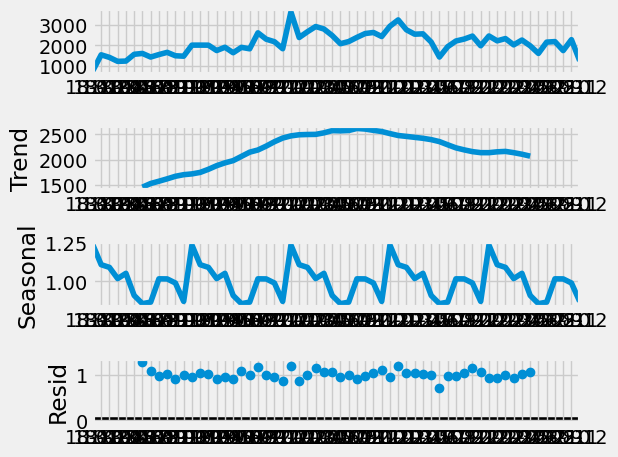

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('fivethirtyeight')
res=seasonal_decompose(pro, model='multiplicative', period=12)
#res.trend.plot()
#res.seasonal.plot()
res.plot()
plt.show()

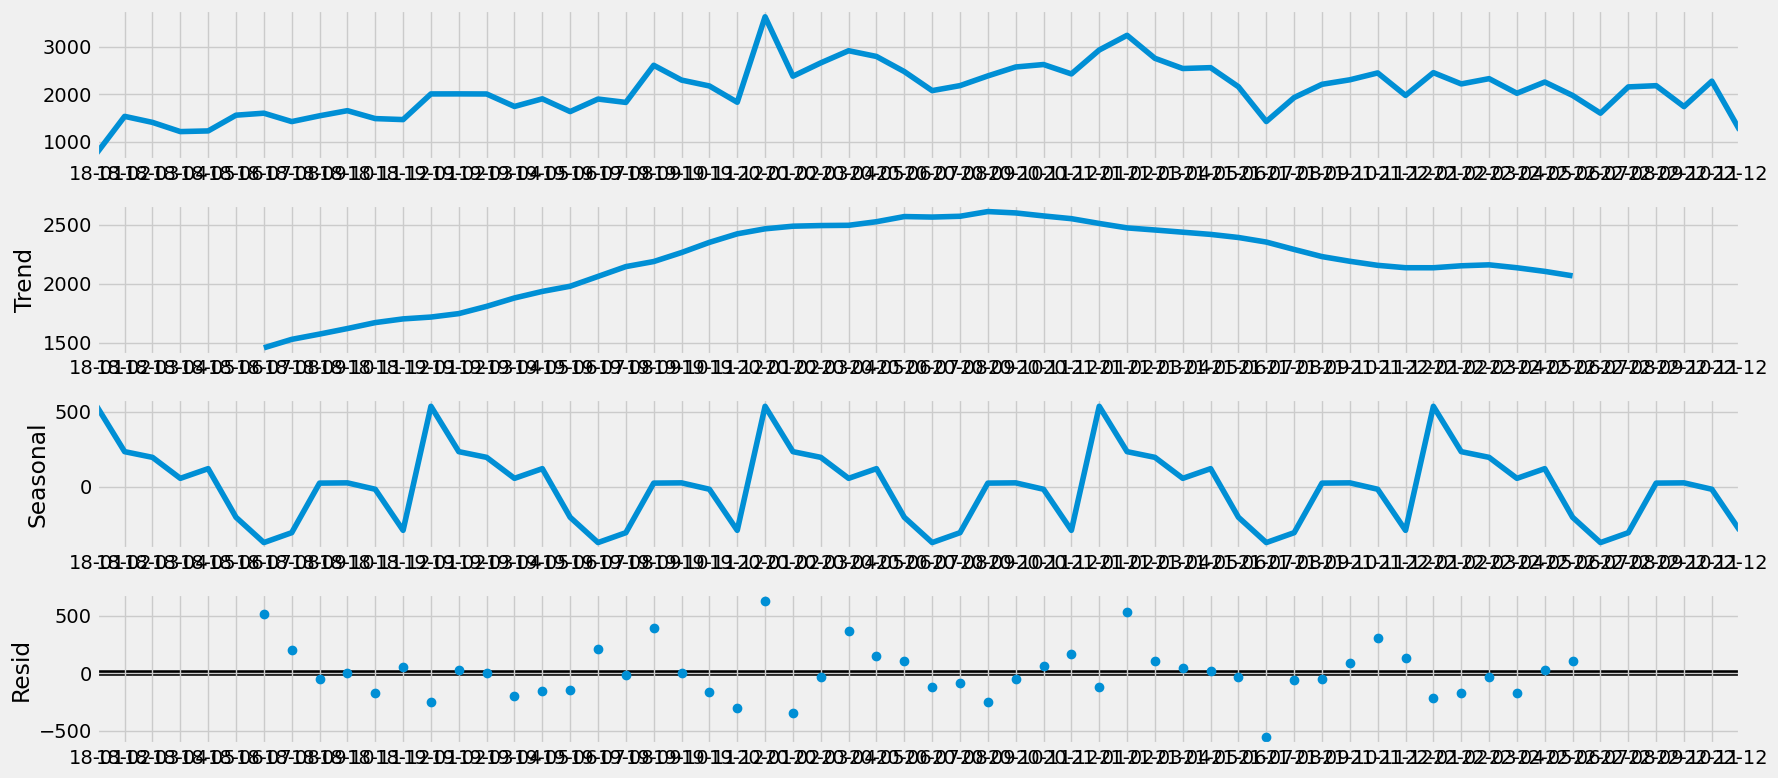

In [216]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(pro, model='additive', period=12)
fig = decomposition.plot()
plt.show()

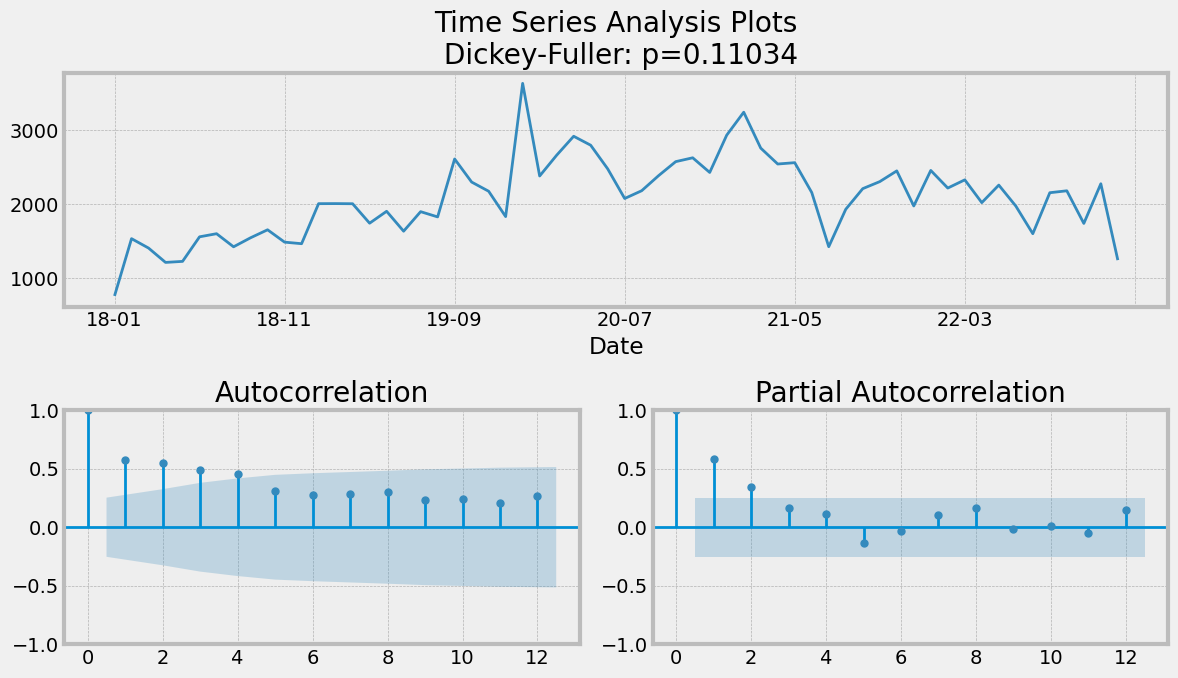

'Dickey-Fuller test:\n   H_0: The time series are not stationary (p_value >= 0.05)\n   H_1: Reject H_0 (p_value < 0.05)\n'

In [203]:
 #import of the function seasonal_decompose из statsmodels 
#from statsmodels.tsa.seasonal import seasonal_decompose
#plt.style.use('fivethirtyeight')
#res=seasonal_decompose(pro, model='multiplicative', period=12)
#res.plot()
#plt.show()


# MAP
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


tsplot(pro['Ship Quantity'], lags=12)
plt.show()
"""Dickey-Fuller test:
    H_0: The time series are not stationary (p_value >= 0.05)
    H_1: Reject H_0 (p_value < 0.05)
"""

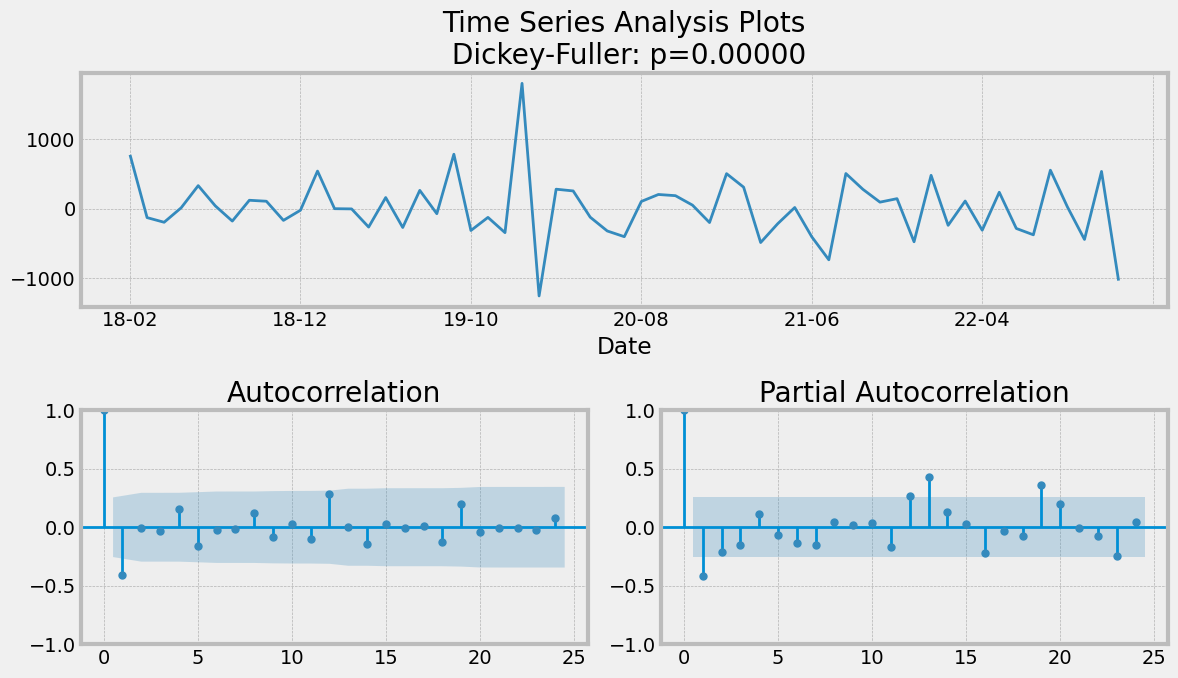

In [204]:
# The seasonal difference
pro_diff = pro['Ship Quantity'] - pro['Ship Quantity'].shift(1)
tsplot(pro_diff[1:], lags=24)

3. CHOOSING PARAMTERS FOR THE SARIMA MODEL

In [205]:
def optimizeSARIMA(parameters_list, d, D, s):
    """Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(pro['Ship Quantity'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

# setting initial parameters for the SARIMA model and some bounds for them
ps = range(0, 3)
ds = range(0, 2) 
qs = range(0, 3)
Ps = range(0, 3)
Ds = range(0, 1) 
Qs = range(0, 2)
s = 12 # season length is still 12

# creating list with all the possible combinations of parameters
parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
warnings.filterwarnings("ignore") 
result_table = optimizeSARIMA(parameters_list, d, D, s)
result_table.head()


  0%|          | 0/96 [00:00<?, ?it/s]

,parameters,aic
0,"(1, 1, 0, 1)",716.437562
1,"(1, 1, 1, 1)",716.657029
2,"(1, 2, 0, 1)",717.899762
3,"(1, 1, 2, 0)",717.936626
4,"(2, 1, 0, 1)",717.980068


4. APPLYING THE SARIMA MODEL FOR THE SELECTED PARAMETERS AND ANALYZING THE RESULT

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9802      0.023     41.849      0.000       0.934       1.026
ma.L1         -0.6063      0.120     -5.046      0.000      -0.842      -0.371
ma.S.L12      -0.6595      0.299     -2.209      0.027      -1.245      -0.074
sigma2      1.369e+05    2.6e+04      5.263      0.000    8.59e+04    1.88e+05


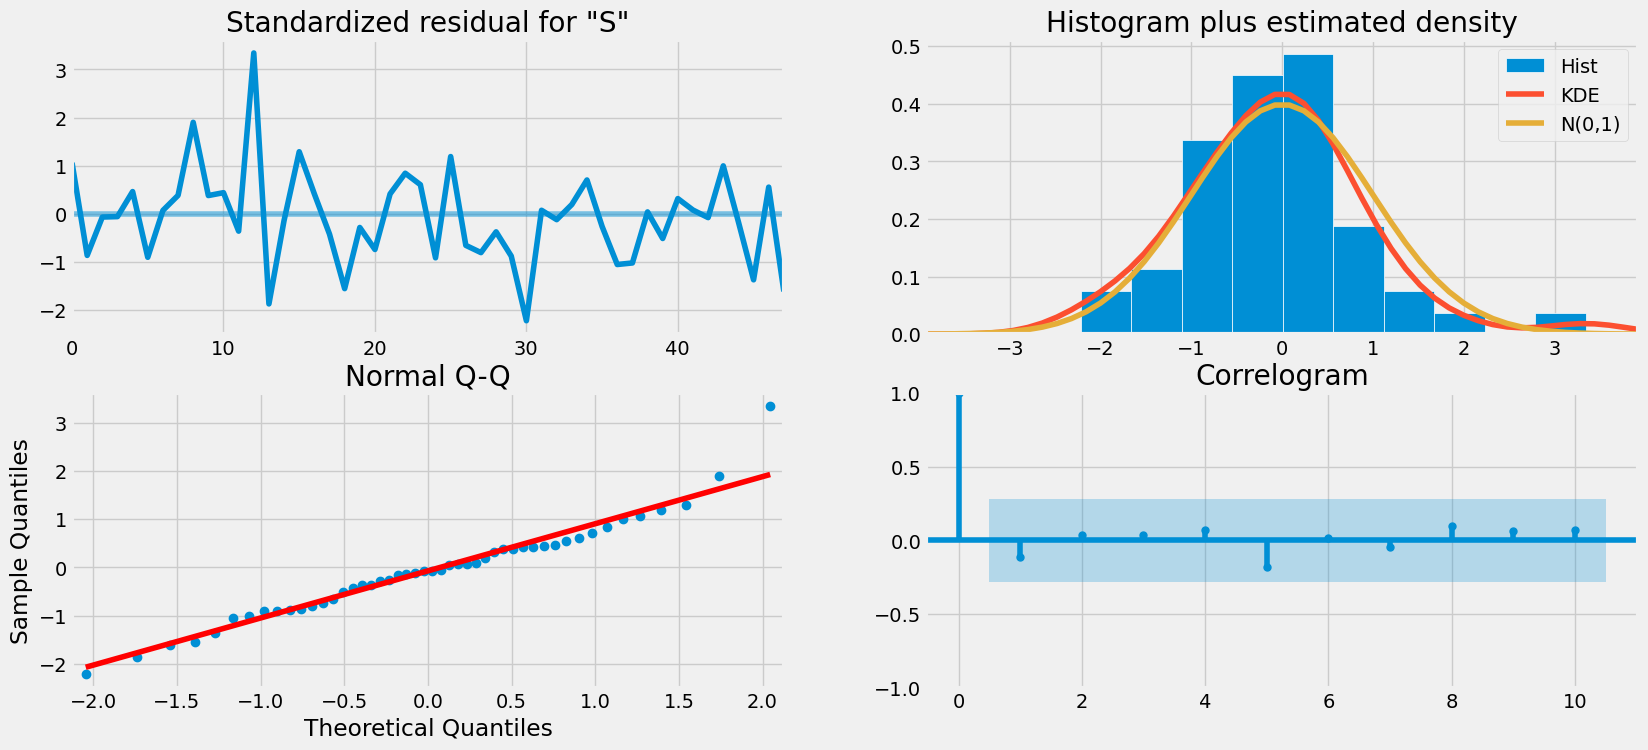

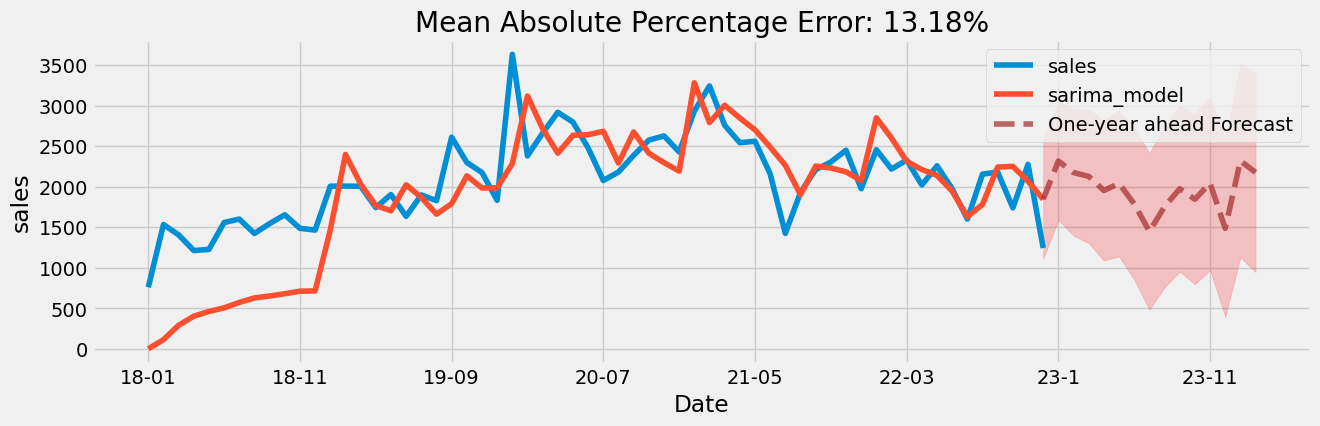

In [206]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(pro, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary().tables[1])

best_model.plot_diagnostics(figsize=(18, 8))
plt.show()


def plotSARIMAX(series, model, n_steps, category):
    """Plots model vs predicted values
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        category - name of the numerical data    
    """
    # adding model values
    data = series.copy()
    data.columns = [category]
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    #data['sarima_model'][:s] = np.NaN
    
    date_scale=[['23-1', ''],['23-2', ''],['23-3', ''],['23-4', ''],['23-5', ''],['23-6', ''],['23-7', ''],['23-8', ''],['23-9', ''],['23-10', ''],['23-11', ''],['23-12', '']]
    date_scale_df=pd.DataFrame(date_scale, columns=['Date', category])
    date_scale_df=date_scale_df.set_index(['Date'])
    data=data.append(date_scale_df)

    error = mean_absolute_percentage_error(data[category][s+d:], data['sarima_model'][s+d:])
    
    prediction = model.get_prediction(start=data.shape[0]-n_steps-1, end = data.shape[0]+1, dynamic=False)
    data[category][60:] = np.NaN
    pred_conf_int = prediction.conf_int()
    data_graph = data.plot()
    prediction.predicted_mean.plot(ax=data_graph, label='One-year ahead Forecast', alpha=.7, figsize=(14, 4), color='brown', linestyle='dashed')
    data_graph.fill_between(pred_conf_int.index,
                pred_conf_int.iloc[:, 0],
                pred_conf_int.iloc[:, 1], color='red', alpha=.2)
    data_graph.set_xlabel('Date')
    data_graph.set_ylabel(category)
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    #plt.grid()
    plt.legend()
    plt.show()

plotSARIMAX(pro, best_model, 12, 'sales')